# Prediction of Risk of Heart Attack
##### By Saai Sudarsanan D

# Table of Contents
* [Introduction](#Introduction)
* [Data](#Data)
* [Methodology](#Methodology)
* [Analysis](#Analysis)
    * [Data Cleaning](#Data-Cleaning)
    * [Data Visualisation](#Visualisation)
    * [Predicting- Logistic Regression](#Algorithm-(MultiVariate-Logistic-Regression))

# Introduction

Heart disease is the major cause of morbidity and mortality globally: it accounts for **more deaths annually than any other cause**. According to the **WHO**, an estimated **17.9 million people died** from heart disease in 2016, representing **31%** of all global deaths. Over **three quarters** of these deaths took place in **low- and middle-income countries**.

A heart attack occurs when one or more of your **coronary arteries becomes blocked**. Over time, a buildup of fatty deposits, including cholesterol, form substances called **plaques**, which can narrow the arteries (atherosclerosis). This condition, called **coronary artery disease, causes most heart attacks**.

Machine Learning can play an essential role in **predicting presence/absence of Locomotor disorders**, Heart diseases and more. Such information, **if predicted** well in advance, can **provide important insights** to doctors who can then adapt their **diagnosis** and **treatment** per patient basis.

# Data

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient.
It is integer valued from 0 (no presence) to 4.
* **age** - age(age in years)
* **sex** - sex(1 = male; 0 = female)
* **cp** - chest pain type (4 values)(1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
* **trestbp** - resting blood pressure(in mm Hg on admission to the hospital)
* **chol** - serum cholestoral in mg/dl
* **fbs** - fasting blood sugar > 120 mg/dl ( 0 or 1 ) 
* **restecg** - resting electrocardiographic results (values 0,1,2)(0 = normal; 1 = having ST-T; 2 = hypertrophy)
* **thalach** - maximum heart rate achieved
* **exang** - exercise induced angina
* **oldpeak** - ST depression induced by exercise relative to rest
* **slope** - the slope of the peak exercise ST segment(1 = upsloping; 2 = flat; 3 = downsloping)
* **ca** - number of major vessels (0-3) colored by flourosopy
* **thal** - 3 = normal; 6 = fixed defect; 7 = reversable defect

**Creators:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
* Donor:
* David W. Aha (aha '@' ics.uci.edu)

We will also be looking at Chloropeth map generated with the help of data obtained and cleaned from WHO, comparing the countries that have higher mortality rates due to  heart attacks. We will be analysing how the Climatic conditions of some contries may contribute to this.
The dataset contains: 
* The Country Name
* Death Rate Per 100,000 (Due to Cardiovascular diseases - Age Standardized)
* Latitude of the Country
* Longitude of the Country

# Methodology

We will be using Decision Trees to predict a 10 year risk of developing coronary heart disease (CHD) — (binary: “1”, means “There is a risk”, “0” means “There is no risk”). Logistic Regression uses a sigmoid graph and varies between 0 and 1. We will have a closer look at the graph in the future. The algorith uses the patient's medicial history in order to predict.


# Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium

### Data Cleaning

In [3]:
df = pd.read_csv(r'C:\Users\saais\Desktop\Computer_programming\Datasets\Analysing the Risk of Heart Attacks using Logistic Regression\heart.csv')
countries = pd.read_csv(r'C:\Users\saais\Desktop\Computer_programming\Datasets\Analysing the Risk of Heart Attacks using Logistic Regression\Heart_Attack_Mortality_Country_Wise.csv',index_col = ['Rank'])
print('The DataFrame has ' + str(df.isnull().sum().sum()) + ' missing values')
df.head()

The DataFrame has 0 missing values


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [99]:
print('The DataFrame has ' + str(countries.isnull().sum().sum()) + ' missing values')
countries.head()

The DataFrame has 0 missing values


,Name,Latitude,Longitude,Rate
Rank,,,,
1,TURKMENISTAN,38.969719,59.556278,379.03
2,KYRGYZSTAN,41.204380,74.766098,361.17
3,YEMEN,15.552727,48.516388,345.80
4,UZBEKISTAN,41.377491,64.585262,331.98
5,UKRAINE,48.379433,31.165580,328.39


In [6]:
corr = df.corr()
df.corr()# Compute the correlation matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Visualisation

SOME COLUMNS MAY BE IRRELAVANT


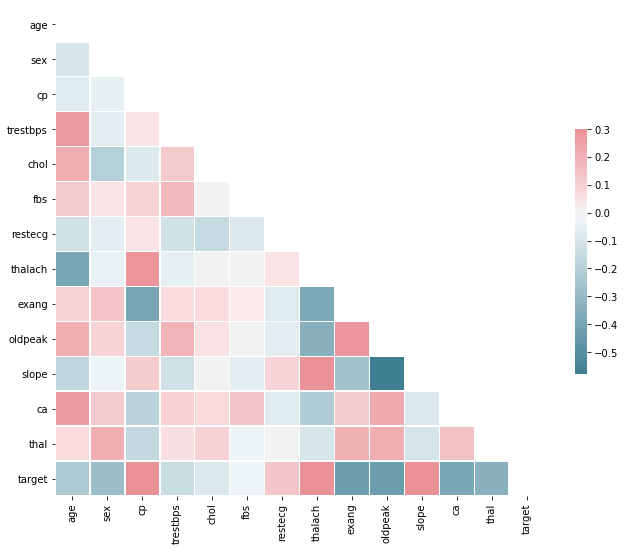

In [7]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

print('SOME COLUMNS MAY BE IRRELAVANT')
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Gender Bias

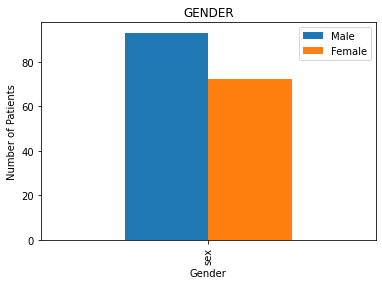

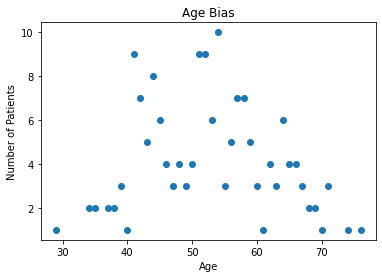

In [8]:
gen = df['sex'].where(df['target'] == 1).value_counts().to_frame().transpose() # Total 138
gen.columns = ['Male','Female']
a = gen.plot(kind = 'bar')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.title('GENDER')
plt.show(a)
age = df['age'].where(df['target'] == 1).value_counts().to_frame()
age = age.reset_index()
b = plt.scatter(y = 'age',x = 'index' ,data = age)
plt.ylabel('Number of Patients')
plt.xlabel('Age')
plt.title('Age Bias')
plt.show(b)

PEOPLE WHO SUFFER AN ATTACK
    non-anginal pain  atypical angina  typical angina  asymptomatic
cp                69               41              39            16
PEOPLE WHO WERE SURVEYED
    typical angina  non-anginal pain  atypical angina  asymptomatic
cp             143                87               50            23


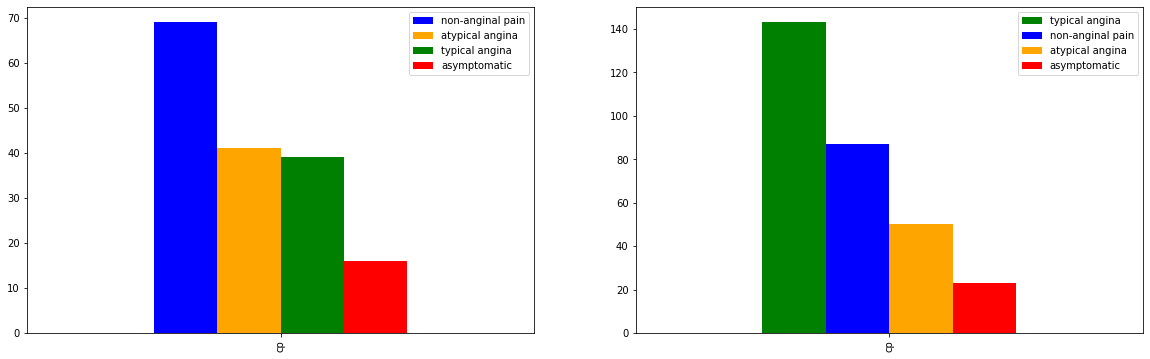

In [9]:
#cp - chest pain type (4 values)(1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
fig,axs = plt.subplots(1,2,figsize = (20,6))
cp_dat = df['cp'].where(df['target'] == 1).value_counts().to_frame().transpose()
cp_dat_total = df['cp'].value_counts().to_frame().transpose()
cp_dat.rename(columns = {0:'typical angina', 1:'atypical angina', 2:'non-anginal pain', 3:'asymptomatic'},inplace = True)
cp_dat_total.rename(columns = {0:'typical angina', 1:'atypical angina', 2:'non-anginal pain', 3:'asymptomatic'},inplace = True)
cp_dat.plot(kind = 'bar',ax = axs[0],color = ['blue','orange','green','red'])
print('PEOPLE WHO SUFFER AN ATTACK')
print(cp_dat)
cp_dat_total.plot(kind = 'bar',ax = axs[1],color = ['green','blue','orange','red'])
print('PEOPLE WHO WERE SURVEYED')
print(cp_dat_total)

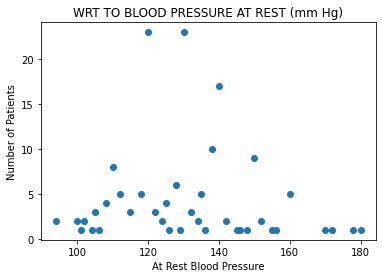

In [10]:
bpdat = df['trestbps'].where(df['target'] == 1).value_counts().to_frame()
bpdat = bpdat.reset_index()
c = plt.scatter(y = 'trestbps',x = 'index' ,data = bpdat)
plt.ylabel('Number of Patients')
plt.xlabel('At Rest Blood Pressure')
plt.title('WRT TO BLOOD PRESSURE AT REST (mm Hg)')
plt.show(c)

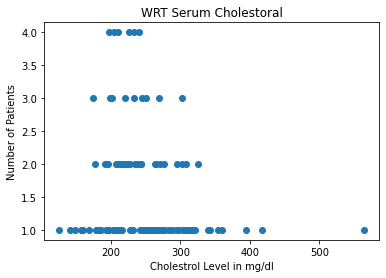

In [11]:
choldat = df['chol'].where(df['target'] == 1).value_counts().to_frame()
choldat = choldat.reset_index()
d = plt.scatter(y = 'chol',x = 'index' ,data = choldat)
plt.ylabel('Number of Patients')
plt.xlabel('Cholestrol Level in mg/dl')
plt.title('WRT Serum Cholestoral')
plt.show(d)

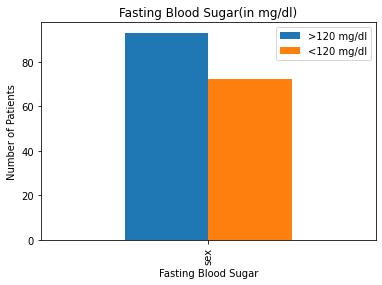

In [12]:
fbsdat = df['sex'].where(df['target'] == 1).value_counts().to_frame().transpose() # Total 138
fbsdat.columns = ['>120 mg/dl','<120 mg/dl']
e = fbsdat.plot(kind = 'bar')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Number of Patients')
plt.title('Fasting Blood Sugar(in mg/dl)')
plt.show(e)

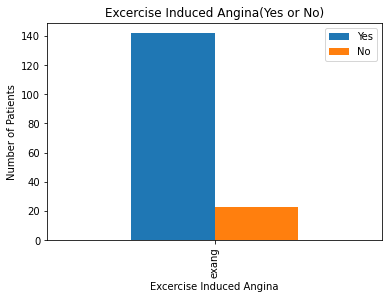

In [13]:
exangdat = df['exang'].where(df['target'] == 1).value_counts().to_frame().transpose() # Total 138
exangdat.columns = ['Yes','No']
f = exangdat.plot(kind = 'bar')
plt.xlabel('Excercise Induced Angina')
plt.ylabel('Number of Patients')
plt.title('Excercise Induced Angina(Yes or No)')
plt.show(f)

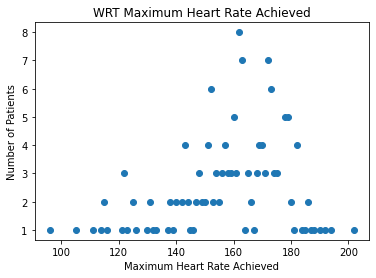

In [14]:
hrdat = df['thalach'].where(df['target'] == 1).value_counts().to_frame()
hrdat = hrdat.reset_index()
g = plt.scatter(y = 'thalach',x = 'index' ,data = hrdat)
plt.ylabel('Number of Patients')
plt.xlabel('Maximum Heart Rate Achieved')
plt.title('WRT Maximum Heart Rate Achieved')
plt.show(g)

PEOPLE WHO SUFFER AN ATTACK
         having ST-T  normal  hypertrophy
restecg           96      68            1
PEOPLE WHO WERE SURVEYED
         having ST-T  normal  hypertrophy
restecg          152     147            4


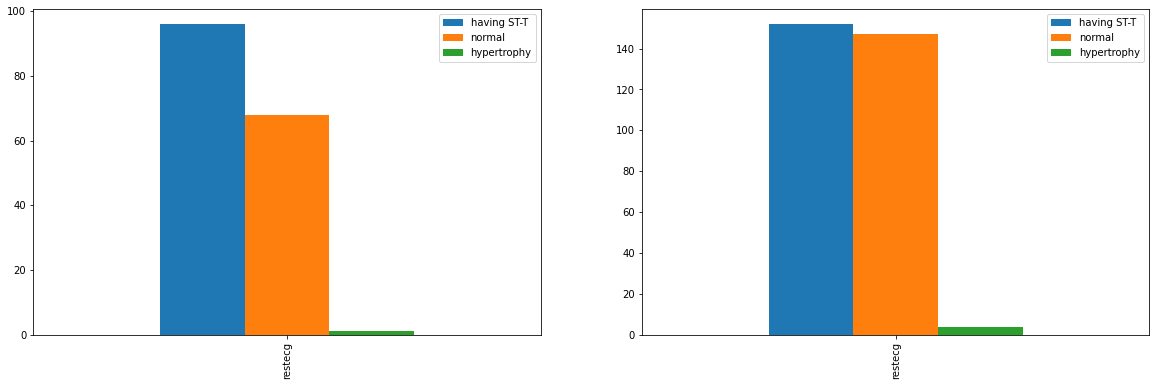

In [15]:
#restecg - resting electrocardiographic results (values 0,1,2)(0 = normal; 1 = having ST-T; 2 = hypertrophy)
fig,axs = plt.subplots(1,2,figsize = (20,6))
ecg_dat = df['restecg'].where(df['target'] == 1).value_counts().to_frame().transpose()
ecg_dat_total = df['restecg'].value_counts().to_frame().transpose()
ecg_dat.rename(columns = {0:'normal', 1:'having ST-T', 2:'hypertrophy'},inplace = True)
ecg_dat_total.rename(columns = {0:'normal', 1:'having ST-T', 2:'hypertrophy'},inplace = True)
ecg_dat.plot(kind = 'bar',ax = axs[0])
print('PEOPLE WHO SUFFER AN ATTACK')
print(ecg_dat)
ecg_dat_total.plot(kind = 'bar',ax = axs[1])
print('PEOPLE WHO WERE SURVEYED')
print(ecg_dat_total)

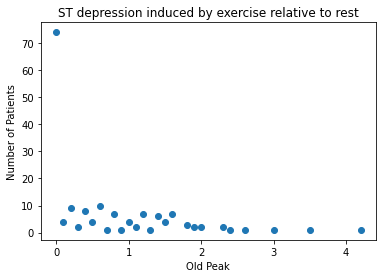

In [16]:
opdat = df['oldpeak'].where(df['target'] == 1).value_counts().to_frame()
opdat = opdat.reset_index()
h = plt.scatter(y = 'oldpeak',x = 'index' ,data = opdat)
plt.ylabel('Number of Patients')
plt.xlabel('Old Peak')
plt.title('ST depression induced by exercise relative to rest')
plt.show(h)

PEOPLE WHO SUFFER AN ATTACK
       downsloping  flat  upsloping
slope          107    49          9
PEOPLE WHO WERE SURVEYED
       downsloping  flat  upsloping
slope          142   140         21


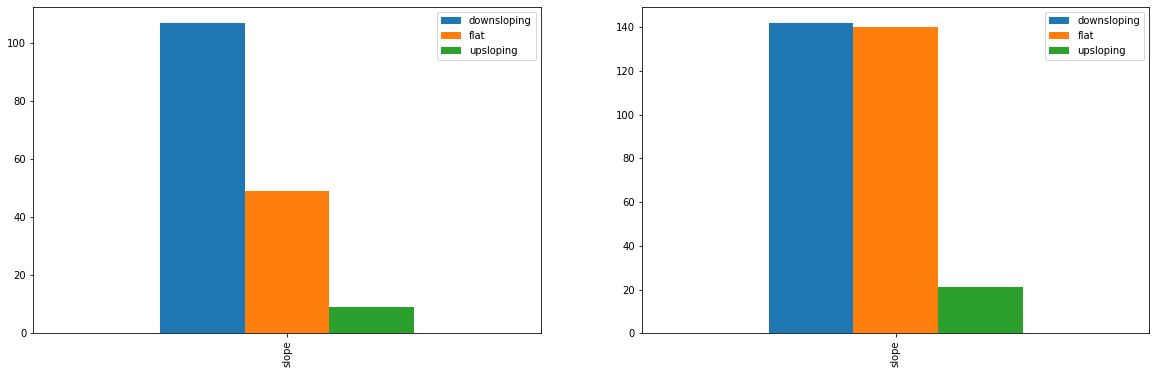

In [17]:
#slope - the slope of the peak exercise ST segment(1 = upsloping; 2 = flat; 3 = downsloping)
fig,axs = plt.subplots(1,2,figsize = (20,6))
slope_dat = df['slope'].where(df['target'] == 1).value_counts().to_frame().transpose()
slope_dat_total = df['slope'].value_counts().to_frame().transpose()
slope_dat.rename(columns = {0:'upsloping', 1:'flat', 2:'downsloping'},inplace = True)
slope_dat_total.rename(columns = {0:'upsloping', 1:'flat', 2:'downsloping'},inplace = True)
slope_dat.plot(kind = 'bar',ax = axs[0])
print('PEOPLE WHO SUFFER AN ATTACK')
print(slope_dat)
slope_dat_total.plot(kind = 'bar',ax = axs[1])
print('PEOPLE WHO WERE SURVEYED')
print(slope_dat_total)

PEOPLE WHO SUFFER AN ATTACK
    One  Two  Three  Five  Four
ca  130   21      7     4     3
PEOPLE WHO WERE SURVEYED
    One  Two  Three  Four  Five
ca  175   65     38    20     5


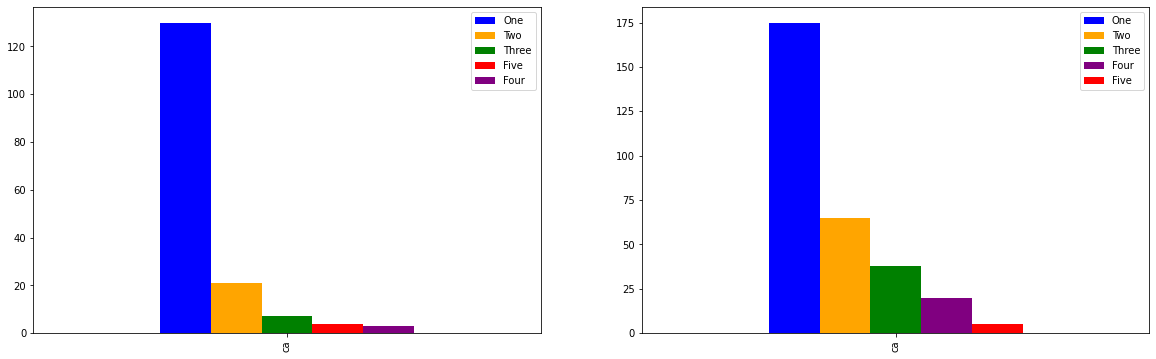

In [48]:
#ca - number of major vessels (0-3) colored by flourosopy
fig,axs = plt.subplots(1,2,figsize = (20,6))
ca_dat = df['ca'].where(df['target'] == 1).value_counts().to_frame().transpose()
ca_dat_total = df['ca'].value_counts().to_frame().transpose()
ca_dat.rename(columns = {0:'One', 1:'Two', 2:'Three',3:'Four',4:'Five'},inplace = True)
ca_dat_total.rename(columns = {0:'One', 1:'Two', 2:'Three',3:'Four',4:'Five'},inplace = True)
ca_dat.plot(kind = 'bar',ax = axs[0],color = ['blue','Orange','Green','Red','purple'])
print('PEOPLE WHO SUFFER AN ATTACK')
print(ca_dat)
ca_dat_total.plot(kind = 'bar',ax = axs[1],color = ['blue','Orange','Green','purple','Red'])
print('PEOPLE WHO WERE SURVEYED')
print(ca_dat_total)

### Algorithm (MultiVariate Logistic Regression)

In [81]:
X = np.asarray(df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach','exang','oldpeak','slope','ca','thal']])
y = np.asarray(df['target'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C = 0.5, solver='newton-cg').fit(X_train,y_train)

In [83]:
yhat = LR.predict(X_test)
print(yhat)
yhat_prob = LR.predict_proba(X_test)
print(yhat_prob)

[1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1]
[[0.26268722 0.73731278]
 [0.93211157 0.06788843]
 [0.4686945  0.5313055 ]
 [0.02018532 0.97981468]
 [0.2031403  0.7968597 ]
 [0.61089151 0.38910849]
 [0.7838711  0.2161289 ]
 [0.05965964 0.94034036]
 [0.27080555 0.72919445]
 [0.17132245 0.82867755]
 [0.26426571 0.73573429]
 [0.03227877 0.96772123]
 [0.27317776 0.72682224]
 [0.66444504 0.33555496]
 [0.16582738 0.83417262]
 [0.99222586 0.00777414]
 [0.11666519 0.88333481]
 [0.11243536 0.88756464]
 [0.86114682 0.13885318]
 [0.41131466 0.58868534]
 [0.07499784 0.92500216]
 [0.30624503 0.69375497]
 [0.97736149 0.02263851]
 [0.35793305 0.64206695]
 [0.31485463 0.68514537]
 [0.94423085 0.05576915]
 [0.59894029 0.40105971]
 [0.03950053 0.96049947]
 [0.48151047 0.51848953]
 [0.98055326 0.01944674]
 [0.74768474 0.25231526]
 [0.45044345 0.54955655]
 [0.01888459 0.98111541]
 [0.18591582 0.81408418]
 [0.31348129 0.68651871]


In [84]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
print('The Log Loss is: ' + str(log_loss(y_test, yhat_prob)))
print('Jaccard Similarity Score is : ' + str(jaccard_score(y_test, yhat)))
print('F1 Score is : ' + str(f1_score(y_test,yhat)))

The Log Loss is: 0.3048078522156877
Jaccard Similarity Score is : 0.875
F1 Score is : 0.9333333333333333


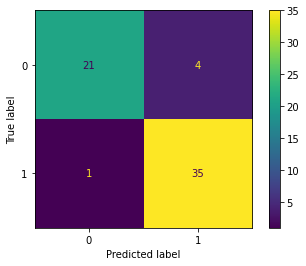

In [85]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, X_test, y_test)

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.90      0.97      0.93        36

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61

